# Логирование

**Логирование** &mdash; это способ сохранения информации о ходе работы программы. Логирование позволяет детально изучать то, что происходит во время выполнения вашего кода, в том числе и после его завершения.

Менее формально это можно определить как текстовую информацию о ходе выполнения программы, которая выводится на экран или сохраняется в файл.

Простейшая реализация логирования в Python это функция `print`, которая позволяет печатать сообщения на экран или в файл. `print` вполне подходит для простых скриптов и небольших проектов, но он не очень удобен и гибок для использования в относительно крупных проектах, поэтому существуют специальные продвинутые библиотеки, которые облегчают и улучшают работу с логированием

## Уровни логирования

**Логи** по сути представляют из себя набор записей, несущих определённую полезную информацию. Данную информацию принято разделять по уровням (**Levels**):
1. `DEBUG` &mdash; сообщения для отладки, всякая служебная информация, которая не всегда бывает необходима
2. `INFO` &mdash; информационные сообщения. Их используют для того, чтобы сообщить какую-то полезную информацию. Например, вы обучаете нейросеть и **логируете** метрики на каждой эпохе обучения, для подобных сообщений хорошо подойдёт уровень `INFO`
3. `WARNING` &mdash; сообщения на которые нужно обратить внимание. Данный уровень обычно включает сообщения, которые сообщают о **потенциальной угрозе ошибки** или о том, что что-то пошло не так, но программа способна продолжить своё исполнение. Например, у вас есть функция для комплементирования нуклеиновых кислот и вы передаёте ей строку "AGC", функция не может понять, что перед ней, ДНК или РНК, в такой ситуации логично будет логировать сообщение с уровнем `WARNING` и сделать тип НК по-умолчанию для таких случаев.
4. `ERROR` &mdash; сообщения об ошибках. Уровень `ERROR`, как правило, имеют сообщения, сигнализирующие об ошибках в ходе выполнения программы, которые не являются критичными и программа способна продолжить свою работу. Например, вам нужно сделать запрос к 1000 URL адресов и проанализировать ответ. В некоторых ситуациях возникновение ошибки это не повод останавливать работу всего кода. Если проблема не в вашем коде, а в сайте по заданному URL, то вам нужно просто его пропустить, но сохранить информацию о том, что он спровоцировал ошибку, для логирования подобных ошибок используется уровень `ERROR`.
5. `CRITICAL` &mdash; сообщения о критических ошибках, которые приводят к завершению работы программы
6. Разные библиотеки могут придумывать свои собственные уровни (например, в `loguru` есть уровень `SUCCESS`), но перечисленные в пунктах 1-5 являются основными и являются стандартом для логирования, причём не только в питоне

## Модуль `logging`

In [1]:
import logging
import sys

`logging` это один из модулей стандартной библиотеки питона (не требует установки). Данный модуль является относительно низкоуровневым, его полезно знать, так как он отображает общую логику работы библиотек для логирования. После того, как вы разберётесь с `logging`, работа с другими библиотеками для вас не составит большого труда

Логирование в данном модуле осуществляют специальные объекты типа `Logger`. Данные объекты можно создавать и конфигурировать при помощи двух способов:
+ Высокоуровневый способ. Простой, но не гибкий, конфигурация применяется сразу ко всей программе
+ Низкоуровневый способ. Чуть более сложный, очень гибкий, можно детально конфигурировать логику работы

### Высокоуровневая конфигурация `logging`

По-умолчанию, `logging` использует так называемый `root logger` (это тоже объект типа `Logger`, который в неявном виде используется верхнеуровневым интерфейсом `logging`)

Для создания логов при помощи `root Logger`а используются функции `logging.<level>`. Например

In [2]:
logging.debug("This is debug message")
logging.info("This is info message")
logging.warning("This is warning")
logging.error("This is error")
logging.critical("This is critical error")

ERROR:root:This is error
CRITICAL:root:This is critical error


По-умолчанию данные логи выглядят совсем не впечатляюще, более того, по-умолчанию у `root logger`а стоит фильтр на все уровни ниже `WARNING`, поэтому сообщения из `logging.debug` и `logging.info` не отобразились.

Для того, чтобы логи выглядели привлекательно и были более полезными, их нужно уметь настраивать

Для конфигурации `root logger` используется функция `logging.basicConfig`

```python
logging.basicConfig(
    filename="logs.log",
    filemode="w",
    format="{levelname} | {asctime} --> {module} {funcName} --> {message}", 
    datefmt="%Y-%m-%d %H:%M:%S",
    style="{",    # "%", "{" или "$"
    level=logging.DEBUG,
    # stream=sys.stdout,
    # handlers=[],
    force=True,
    encoding="utf-8",
    errors="ignore"
)
```

В коде выше приведены все аргументы `logging.basicConfig`. Вызов данной функции приведёт к изменению свойств `root logger`

Данная функция имеет три взаимоисключающих аргумента (при вызове нужно указать только один из них):
1. `filename` &mdash; при указании данного аргумента логи будут записываться в указанный файл вместо `sys.stderr` по-умолчанию. Ряд остальных аргументов имеет эффект только, если указан `filename`
    + `filemode` &mdash; режим открытия файла `filename` для сохранения логов
    + `encoding` &mdash; кодировка с которой открывается `filename` (как правило, не нужен)
    + `errors` &mdash; что делать с ошибками при записи в `filename` (как правило, не нужен)
2. `stream` &mdash; поток в который должна производится запись. Это может быть или один из стандартных потоков (`sys.stdout`, `sys.stderr`), или file-like object из модуля `io`, например, `io.StringIO`. В случае указания этого аргумента запись будет производиться в поток, а не в файл
3. `handlers` &mdash; список заранее сконфигурированных обработчиков, которые определяют куда и как будут записаны логи. О них мы поговорим позже

Также функция `logging.basicConfig` имеет независимые аргументы:
+ `format` &mdash; это строка, которая определяет структуру и основные элементы сообщения в логах. От нас требуется сделать "каркас" сообщения при помощи placeholder'ов, при логировании они будут заменяться на полезную информацию. [Их полный список есть в документации](https://docs.python.org/3/library/logging.html#logrecord-attributes). Например, указание `format="%(asctime)s %(levelname)s +++ %(message)s"` приведёт к тому, что в логах мы увидим сообщения следующего формата (дата и время, уровень лога, сообщение)

     ```
     2023-04-27 22:30:56,899 WARNING +++ message1
     2023-04-27 22:30:57,567 ERROR +++ message2
     2023-04-27 22:32:58,978 CRITICAL +++ message3
     ```
    
    
    При этом все символы за пределом placeholder'ов сохраняются. В данном случае это пробелы и "+++"
+ `datefmt` &mdash; строка, определяющая [способ форматирования](https://docs.python.org/3/library/time.html#time.strftime) даты и времени в логах
+ `style` &mdash; тип форматирования для аргумента `format`. Если указать `style='{'`, то форматирование из примера выше можно было бы записать вот так `format="{asctime} {levelname} +++ {message}"`, выглядит намного симпатичнее
+ `level` &mdash; минимальный уровень логирования, логи с уровнем ниже заданного игнорируются. Для передачи значений в данный аргумент используются специальные значения `logging.<LEVEL>`
+ `force` &mdash; позволяет перезаписать конфигурацию, если она уже была задана. По-умолчанию, первый вызов `logging.basicConfig` применяет новую конфигурацию, а остальные вызовы игнорируются

Для примера давайте настроим логгер, который будет записывать *ошибки* в файл `errors.log`

In [3]:
logging.basicConfig(
    filename="errors.log",
    filemode="w",
    style="{",
    format="{levelname}❗❗❗ {asctime} 🌞 {message}",
    level=logging.ERROR,
    force=True
)

In [4]:
logging.warning("Some warning text")
logging.error("Some error text")
logging.critical("Some critical text")

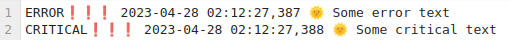

А также настроим логгер, который будет записывать все логи в `stdout`

In [5]:
logging.basicConfig(
    style="{",
    format="{levelname}❗❗❗ {asctime} 🌞 {message}",
    level=logging.DEBUG,
    stream=sys.stdout,
    force=True
)

In [6]:
logging.debug("Some debug text")
logging.info("Some info text")
logging.warning("Some warning text")
logging.error("Some error text")
logging.critical("Some critical text")

DEBUG❗❗❗ 2023-04-29 21:19:30,081 🌞 Some debug text
INFO❗❗❗ 2023-04-29 21:19:30,082 🌞 Some info text
WARNING❗❗❗ 2023-04-29 21:19:30,082 🌞 Some warning text
ERROR❗❗❗ 2023-04-29 21:19:30,083 🌞 Some error text
CRITICAL❗❗❗ 2023-04-29 21:19:30,083 🌞 Some critical text


Мы научились конфигурировать `root logger` и этого хватает для базовых задач, но данный подход пока что не позволяет нам создавать более сложные логгеры. Например, если мы хотим, чтобы логи сохранялись и в файл, и записывались в `stderr`. Но, к счастью, такие штуки можно делать при помощи низкоуровневого интерфейса `logging`

### Низкоуровневая конфигурация `logging`

Для низкоуровневой конфигурации `logging` нам нужно будет вручную оперировать различными объектами, давайте рассмотрим их

#### `logging.Logger`

Как уже упоминалось ранее, `Logger` это главный объект, используемый для логирования. Если мы хотим создать свой `Logger`, то можно пользоваться не только конструктором класса, а также отдельной функцией `logger.getLogger`. Данной функции нужно передать один аргумент &mdash; имя логгера, если этого не сделать, то вы получите экземпляр `root logger`а

In [7]:
logger = logging.getLogger("my_logger")

Объект `Logger` обладает методами `<level>` для логирования на соответствующих уровнях

In [8]:
logger.info("fdsdfsd")
logger.critical("fdsdfsd")

INFO❗❗❗ 2023-04-29 21:19:33,580 🌞 fdsdfsd
CRITICAL❗❗❗ 2023-04-29 21:19:33,581 🌞 fdsdfsd


При создании логгер наследует свойства `root logger`а. Чтобы этого избежать, `Logger` можно создать через конструктор

In [9]:
logger = logging.Logger(name="my_logger")

In [10]:
logger.info("fdsdfsd")
logger.critical("fdsdfsd")

fdsdfsd


#### `logging.Handler`

`Handler`ы это специальные объекты, которые определяют **куда** будут записываться логи, например, в файл, в поток или куда-то ещё. Самые основные это `FileHandler` и `StreamHandler`, ещё много разных есть в подмодуле `logging.handlers`

In [11]:
file_handler = logging.FileHandler("logs.log", mode='w')   # Handler обспечивающий запись логов в файл
stream_handler = logging.StreamHandler(stream=sys.stdout)  # Handler обспечивающий запись логов в поток

In [12]:
stream_handler.debug    # Handler'ы уже не являются "самостоятельными" объектами, они не могут создавать логи сами

AttributeError: 'StreamHandler' object has no attribute 'debug'

Хотя `Handler`ы и не могут логировать сами, но они являются ядром всего логгера. Созданные `Handler`ы можно включать в состав созданного ранее `Logger`a, причём в состав одного `Logger`a можно включить много `Handler`ов

In [13]:
logger.addHandler(file_handler)     # Добавляем созданнные Handler'ы к созданному ранее Logger'у
logger.addHandler(stream_handler)

In [14]:
logger.error("fdsdfsd")
logger.critical("4134324")   # После выполнения этих строк, сообщения также запишутся в файл "logs.log", так как у Logger'а теперь есть соответствующий Handler, который мы добавили в ячейке выше

fdsdfsd
4134324


Как мы видим, логи у созданных вручную `Logger`ов очень скромные, даже скромнее, чем у `root logger`а, нам нужно научиться их настраивать

Каждый `Handler` можно настроить отдельно, для этого используются методы `Handler.set***`, так например, для `Handler`а можно настроить уровень отображения

In [15]:
file_handler.setLevel(logging.ERROR)
stream_handler.setLevel(logging.INFO)

In [16]:
logger.warning("Warning")
logger.critical("Critical error") 

Warning
Critical error


#### `logging.Formatter`

Данные объекты позволяют задать форматирование сообщений, затем их можно "присоединить" к `Handler`у при помощи `Handler.setFormatter`. Они имеют уже знакомые нам из `logging.baseConfig` аргументы (только `format` называется `fmt`)

In [17]:
file_formatter = logging.Formatter(fmt="{asctime} >>> {levelname} >>> Line #{lineno} >>> {message}", datefmt="%Y-%m", style="{")
stream_formatter = logging.Formatter(fmt="🕒{asctime}🕒 >>> {message}", datefmt="%H:%M:%S", style="{")

file_handler.setFormatter(file_formatter)
stream_handler.setFormatter(stream_formatter)

In [18]:
logger.warning("Warning")
logger.critical("Critical error") 

🕒21:19:40🕒 >>> Warning
🕒21:19:40🕒 >>> Critical error


А в файле `logs.log` появится следующая строка



Таким образом, мы можем создать свой собственный `Logger`, для которого мы можем задать произвольное число любых `Hadnler`ов, имеющих заданные нами форматы вывода и уровень логирования. Кстати, помните у `logging.baseConfig` ещё был аргумент `handlers`? Так вот, созданные `Handler`ы можно при желании передать туда.

Основной интерфейс `logging` можно отобразить в виде простой схемы

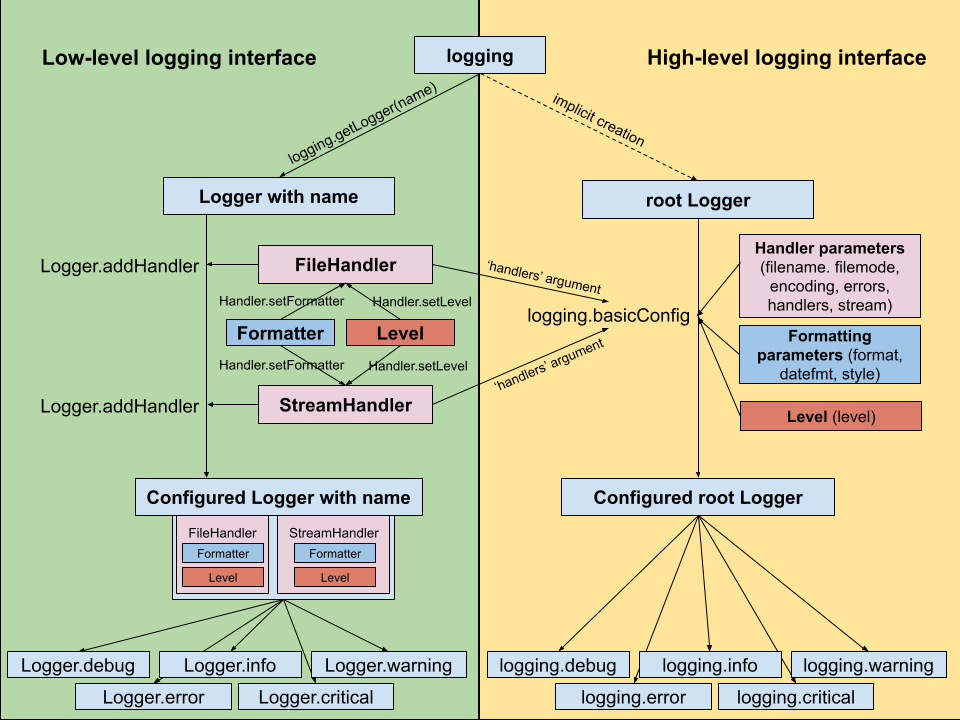

## Ещё немного про уровни логирования

На самом деле уровней логирования бывает бесконечное количество. 0 уровень, 1 уровень, 2 уровень, 3 уровень и так далее, но для простоты использования наиболее распространённым уровням были даны имена. `DEBUG = 10`, `INFO = 20`, `WARNING = 30`, `ERROR = 40`, `CRITICAL = 50`

Даже в модуле `logging` за переменными `logging.<LEVEL>` скрываются просто числа

In [19]:
logging.DEBUG, logging.INFO, logging.WARNING, logging.ERROR, logging.CRITICAL

(10, 20, 30, 40, 50)

Это также означает, что в любом месте, где требуется `level`, можно указывать числа

In [20]:
logger = logging.Logger("my_logger")
handler = logging.StreamHandler(stream=sys.stderr)
handler.setLevel(49)    # <<<<
handler.setFormatter(logging.Formatter(fmt="Level {levelname}: {message}", style='{'))
logger.addHandler(handler)

In [21]:
logger.error("Error")   # Эта строка НЕ логируется, так как уровень Handler'а выше, чем у ERROR (49 > 40)
logger.critical("Critical")   # Эта строка логируется, так как уровень Handler'а ниже, чем у CRITICAL (49 < 50)

Level CRITICAL: Critical


Библиотеки для логирования таже позволяют нам создавать логи абсолютно с любым уровнем. В `logging` это делается при помощи функции `logging.log` или метода `Logger.log`, которые позволяют указать любой уровень

In [22]:
logger = logging.Logger("my_logger")
handler = logging.StreamHandler(stream=sys.stderr)
handler.setLevel(100500)    # Такой уровень Handler'а не пропустит ни один дефолтный уровень логов
handler.setFormatter(logging.Formatter(fmt="Level {levelname}: {message}", style='{'))
logger.addHandler(handler)

In [23]:
logger.error("Error")   # Эта строка НЕ логируется, так как уровень Handler'а выше, чем у ERROR (100500 > 40)
logger.critical("Critical")   # Эта строка НЕ логируется, так как уровень Handler'а выше, чем у ERROR (100500 > 50)

In [24]:
logger.log(level=100501, msg="Super important log message")    # Эта строка логируется, так как уровень Handler'а ниже, чем лога (100500 < 100501)

Level Level 100501: Super important log message


In [25]:
logger.log(level=100499, msg="Less important log message")   # Эта строка НЕ логируется, так как уровень Handler'а выше, чем у лога (100500 > 100499)

## Логирование объектов и исключений

`logging` позволяет передавать в функции для логирования не только строки, но и вообще любые объекты. Работает это также как и `print` (у объектов должен быть метод `__str__`)

In [26]:
import requests


logging.error({"a": 1, "b": 2})
logging.error(5345345345)
logging.error(requests.get("https://google.com"))

ERROR❗❗❗ 2023-04-29 21:19:47,286 🌞 {'a': 1, 'b': 2}
ERROR❗❗❗ 2023-04-29 21:19:47,287 🌞 5345345345
DEBUG❗❗❗ 2023-04-29 21:19:47,289 🌞 Starting new HTTPS connection (1): google.com:443
DEBUG❗❗❗ 2023-04-29 21:19:47,747 🌞 https://google.com:443 "GET / HTTP/1.1" 301 220
DEBUG❗❗❗ 2023-04-29 21:19:47,749 🌞 Starting new HTTPS connection (1): www.google.com:443
DEBUG❗❗❗ 2023-04-29 21:19:48,277 🌞 https://www.google.com:443 "GET / HTTP/1.1" 200 None
ERROR❗❗❗ 2023-04-29 21:19:48,291 🌞 <Response [200]>


Интересный факт! При логировании `requests.get` нашим логгером в вывод также "просочились" подкапотные логи `requests`, так как они тоже реализованы через `logging`, а поскольку мы изменяли свойства `root Logger`а, который является общим для всего, что выполняется в нашем коде, эти изменения затронули и логи из `requests`

`logging` также позволяет нам удобно логировать исключения. Зачастую нам необходимо, чтобы была сохранена ВСЯ информация об исключении, а не только текст ошибки. Для этого необходимо передать перехваченный объект исключения в функцию для логирования и добавить аргумент `exc_info=True`. В результате в логах будет отображён весь текст исключения, в том числе Traceback.

In [27]:
def a():
    b()
    
def b():
    c()
    
def c():
    d()
    
def d():
    raise RuntimeError("Just a random exception")
    

try:
    a()
except RuntimeError as exc:
    logging.error(exc, exc_info=True)
    logging.exception(exc)   # Полностью аналогично коду выше

ERROR❗❗❗ 2023-04-29 21:19:49,150 🌞 Just a random exception
Traceback (most recent call last):
  File "/tmp/ipykernel_313963/2386077047.py", line 15, in <cell line: 14>
    a()
  File "/tmp/ipykernel_313963/2386077047.py", line 2, in a
    b()
  File "/tmp/ipykernel_313963/2386077047.py", line 5, in b
    c()
  File "/tmp/ipykernel_313963/2386077047.py", line 8, in c
    d()
  File "/tmp/ipykernel_313963/2386077047.py", line 11, in d
    raise RuntimeError("Just a random exception")
RuntimeError: Just a random exception
ERROR❗❗❗ 2023-04-29 21:19:49,151 🌞 Just a random exception
Traceback (most recent call last):
  File "/tmp/ipykernel_313963/2386077047.py", line 15, in <cell line: 14>
    a()
  File "/tmp/ipykernel_313963/2386077047.py", line 2, in a
    b()
  File "/tmp/ipykernel_313963/2386077047.py", line 5, in b
    c()
  File "/tmp/ipykernel_313963/2386077047.py", line 8, in c
    d()
  File "/tmp/ipykernel_313963/2386077047.py", line 11, in d
    raise RuntimeError("Just a random 

Если вы используете логирование в вашем проекте, то обязательно логируйте все перехватываемые исключения!

## Ротация логов

Если в вашей программе много логов и вы часто её запускаете, то в один момент файлы с логами начнут cтановиться слишком большими и с трудом открываться при помощи текстовых редакторов. Занимаемое файлом место можно ограничивать при помощи механизма, называемого **ротацией логов** (**logs rotation**).

Суть ротации заключается в том, что вы можете установить ограничения на размер файла с логами, а также ограничения на количество файлов. В `logging` это реализуется при помощи специального `Handler`а &mdash; `logging.handlers.RotatingFileHandler`

In [28]:
logger = logging.Logger("my_logger_with_rotation")
handler = logging.handlers.RotatingFileHandler("rotating_logs.log", maxBytes=100, backupCount=5)   # Каждый файл размером не более 100 байт, не более 5 файлов
handler.setLevel(logging.WARNING)
handler.setFormatter(logging.Formatter(fmt="Level {levelname}: {message}", style='{'))
logger.addHandler(handler)

In [29]:
for _ in range(20):
    logger.error("fhsd;hfgdhgdjfghd;kfjghdfk;ghdfklghdklsfghldsfkg")

При достижении объёма в 100 байт в первом файле, логи начинают записываться во второй и так далее

## Модуль `loguru`

Модуль [`loguru`](https://loguru.readthedocs.io/en/stable/overview.html#overview) не входит в состав стандартной библиотеки и его нужно сначала установить. Он удобен тем, что имеет хорошее и красивое форматирование логов "из коробки"

In [30]:
import sys

from loguru import logger

In [31]:
logger.info()

TypeError: info() missing 1 required positional argument: '_Logger__message'

In [32]:
logger.debug("Debug message")
logger.info("Info message")
logger.warning("Warning message")
logger.error("Error message")
logger.critical("Critical message")
logger.success("Success message")
logger.log(100500, "Custom level message")

2023-04-29 21:19:53.279 | DEBUG    | __main__:<cell line: 1>:1 - Debug message
2023-04-29 21:19:53.281 | INFO     | __main__:<cell line: 2>:2 - Info message
2023-04-29 21:19:53.281 | WARNING  | __main__:<cell line: 3>:3 - Warning message
2023-04-29 21:19:53.281 | ERROR    | __main__:<cell line: 4>:4 - Error message
2023-04-29 21:19:53.282 | CRITICAL | __main__:<cell line: 5>:5 - Critical message
2023-04-29 21:19:53.282 | SUCCESS  | __main__:<cell line: 6>:6 - Success message
2023-04-29 21:19:53.283 | Level 100500 | __main__:<cell line: 7>:7 - Custom level message


В `loguru` не нужно отдельно создавать `Handler`ы, `Logger`ы, `Formatter`ы и так далее. Для всех операций используется `Logger` по-умолчанию (`loguru.logger`). Для добавления `Handler`а в логгер используется всего один метод `logger.add`

In [33]:
logger.remove(0)    # Удалить Handler по-умолчанию

logs_format = '<green>{time:YYYY-MM-DD HH:mm:ss.SSS}</green> | <level>{level: <8}</level> | <cyan>{name}</cyan>:<cyan>{function}</cyan>:<cyan>{line}</cyan> - <level>{message}</level>'
logger.add(       # Добавляем Handler для записи в stdout
    sys.stdout,
    level="DEBUG",
    format=logs_format,
    colorize=True
)
logger.add(       # Добавляем Handler для записи всех логов в файл all_logs.log
    "all_logs.log",
    level=0,
    format=logs_format,
    colorize=False,
    rotation="1 week"
)
logger.add(       # Добавляем Handler для записи ошибок в файл errors_logs.log
    "errors_logs.log",
    level=29,
    format=logs_format,
    colorize=False,
    rotation="500 B"
)

3

In [34]:
logger.debug("Debug message")
logger.info("Info message")
logger.warning("Warning message")
logger.error("Error message")
logger.critical("Critical message")
logger.success("Success message")
logger.log(100500, "Custom level message")

2023-04-29 21:19:55.128 | DEBUG    | __main__:<cell line: 1>:1 - Debug message
2023-04-29 21:19:55.130 | INFO     | __main__:<cell line: 2>:2 - Info message
2023-04-29 21:19:55.130 | WARNING  | __main__:<cell line: 3>:3 - Warning message
2023-04-29 21:19:55.130 | ERROR    | __main__:<cell line: 4>:4 - Error message
2023-04-29 21:19:55.131 | CRITICAL | __main__:<cell line: 5>:5 - Critical message
2023-04-29 21:19:55.131 | SUCCESS  | __main__:<cell line: 6>:6 - Success message
2023-04-29 21:19:55.132 | Level 100500 | __main__:<cell line: 7>:7 - Custom level message


Файл/поток, ротация, форматирование, уровень для `Handler`а устанавливаются в одном месте. Форматирование немного отличается от `logging`, к тому же `loguru` позволяет задавать цвета для элементов. [Пояснения по форматированию есть в документации](https://loguru.readthedocs.io/en/stable/api/logger.html) (раздел "The record dict")

Исключения можно логировать при помощи `logger.opt(exception=True)` &mdash; данный метод возвращает объект, который умеет правильно логировать исключения, `logger.exception`, а также можно декорировать функцию декоратором `@logger.catch`, в таком случае все исключения внутри функции будут автоматически логироваться. Все перечисленные способы равноценны

In [35]:
def a():
    b()
    
def b():
    c()
    
def c():
    d()

@logger.catch(reraise=True)
def d():
    raise RuntimeError("Just a random exception")
    

try:
    a()
except RuntimeError as exc:
    logger.opt(exception=True).error(exc)
    logger.exception(exc)

2023-04-29 21:19:56.300 | ERROR    | __main__:c:8 - An error has been caught in function 'c', process 'MainProcess' (313963), thread 'MainThread' (139785897976768):
Traceback (most recent call last):

  File "/home/roman/anaconda3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
           │         │     └ {'__name__': '__main__', '__doc__': 'Entry point for launching an IPython kernel.\n\nThis is separate from the ipykernel pack...
           │         └ <code object <module> at 0x7f227028d240, file "/home/roman/anaconda3/lib/python3.9/site-packages/ipykernel_launcher.py", line 1>
           └ <function _run_code at 0x7f2270289e50>
  File "/home/roman/anaconda3/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
         │     └ {'__name__': '__main__', '__doc__': 'Entry point for launching an IPython kernel.\n\nThis is separate from the ipykernel pack...
         └ <code object <module> at 0x7f227028d240,

## Рекомендации по библиотекам

Для большинства случаев я советую использовать `loguru`, так как она сильно проще в настройке, но про `logging` тоже не стоит забывать, так как она всё ещё используется во многих проектах

# Полезные ссылки

[Статья на хабре про модуль `logging`](https://habr.com/ru/companies/wunderfund/articles/683880/)

[Документация `loguru`](https://loguru.readthedocs.io/en/stable/)